# 2021 Academy Awards Nominations Predictions Based on Other Major Awards

*with data collected from 2011 - 2020*	

Damn here we go again... 

Sau 1 năm đầy mệt mỏi và trầm cảm kể từ sau khi Parasite làm nên lịch sử ở mùa Oscars 2020 thì thú vui thường niên của những kẻ mê phim (và mê bet nma shhh) đã quay trở lại woohoo!!! Thường thì mọi năm đợt này mình sẽ hype vl ngồi list ra một danh sách rất dàiiiiiiiiiiii những phim cần phải xem trước mùa Oscars để có thể đem những cảm nhận của bản thân (chắc chắn không bias và politicized như kênh phim nào đó thường dịch content từ reddit ^^) dự đoán danh sách đề cử Oscar. Nhưng mà năm nay thì bận thật sự, gần như không có thời gian xem phim, đến ngay cả cái self-project này cũng phải làm siêu rush vì còn cái Hackathon đang làm dở sắp deadline. 

But without a doubt, I sure still wanna enjoy my youth and do the things I love the most, vậy nên năm nay mình sẽ làm nó hơiiii khác đi một tí, bằng việc áp dụng những thứ mình đã được (tự) học về Probability & Statistics và Data Science để dự đoán đề cử Oscars 2021.

So, fasten your seatbelts, it's going to be a bumpy night (!)

## The Question

Câu hỏi lớn mà mình đặt ra cho project lần này là: "Làm thế nào để có thể tính được xác suất một phim được đề cử Oscars dựa trên kết quả đề cử của những giải quan trọng khác tiền Oscars (i.e. BAFTA, Quả Cầu Vàng, Critics' Choice)?". 

Hay nói cách khác, làm thế nào để tính được:
$$
    P\left(O\;\middle|\;\bigcap^n_{i = 0}X_{i}\right)
$$



## The Math

với:
- $O$ là sự kiện một phim được đề cử Oscars
- $X_{1}$, $X_{2}$, ..., $X_{n}$ là sự kiện một phim được đề cử các giải khác tương ứng

*Chú thích: $ P(A|B) $ có thể hiểu được là "the likelihood of event A occurring given that event B is true"*


Ở đây mình có thể sử dụng **định lý Bayes cho đa biến cố độc lập** (lmao chắc dịch ra tiếng Việt nghe như thế) để explore rõ hơn cái đại lượng vừa nêu trên:

$$
    P\left(O\;\middle|\;\bigcap^n_{i = 0}X_{i}\right) = 
    \frac{\displaystyle P\left(\bigcap^n_{i = 0}X_{i}\;\middle|\;O\right) \times P\left(O\right)}
    {\displaystyle P\left(\bigcap^n_{i = 0}X_{i}\;\middle|\;O\right) \times P\left(O\right) + P\left(\bigcap^n_{i = 0}X_{i}\;\middle|\;\neg O\right) \times P\left(\neg O\right)}
$$

Vì ở đây mình chỉ xét đến mối quan hệ giữa Oscars và các giải khác, nên có thể giả định các sự kiện $X_{1}$, $X_{2},...$ là độc lập, vậy nên có thể viết lại đống lằng nhằng rắc rối trên như sau:

$$
    P\left(O\;\middle|\;\bigcap^n_{i = 0}X_{i}\right) = 
    \frac{\displaystyle \prod^n_{i = 0} P\left(X_{i}\;\middle|\;O\right) \times P\left(O\right)}
    {\displaystyle \prod^n_{i = 0} P\left(X_{i}\;\middle|\;O\right) \times P\left(O\right) + \prod^n_{i = 0} P\left(X_{i}\;\middle|\; \neg O\right) \times P\left(\neg O\right)}
$$

Damn trông nó còn tệ hơn............. Nhưng mà khoan lmao no this is actually better, vì mình vừa khẳng định được rằng muốn tính được đại lượng ban đầu thì mình chỉ cần quan tâm đến những kết quả sau:

- $P\left(X_{i}\;\middle|\;O\right)$: xác suất một phim được đề cử giải $X_{i}$ khi được đề cử Oscar 
- $P\left(X_{i}\;\middle|\; \neg O\right)$: xác suất một phim được đề cử giải $X_{i}$ khi **không** được đề cử Oscar
- $P\left(O\right)$: xác suất một phim được đề cử Oscar (độc lập)
- $P\left(\neg O\right)$: xác suất một phim **không** được đề cử Oscar (độc lập)

![Alt Text](https://i.imgur.com/Nfxw1mh.jpg "Optional Title")

Bên trên là ví dụ đơn giản chứng minh cho công thức vừa tìm được ở trên. Từ hình trên mình cũng đồng thời nhận ra rằng để tính được giá trị của $P\left(O\right)$ và $P\left(\neg O\right)$, ta còn cần biết tổng số phim (như ở trên là 20). Vì tổng số phim là thứ không thể tính được và thay đổi theo từng hạng mục, nên mình quyết định sẽ lấy tổng tất cả các phim được đề cử ở ít nhất một giải thưởng làm giá trị này (với những hạng mục không có shortlist của Oscar), hoặc lấy số lượng phim Oscar đưa vào shortlist (với những hạng mục có shortlist).

## The Idea

Vậy, mình đã có trong tay công thức để tính, so where can we get the data to build a model for calculation? Mình quyết định sẽ lấy dữ liệu đề cử của Oscars cũng như là của các giải tiền Oscars khác trong 10 năm (từ 2011 - 2020). 

Mình sẽ dùng số dữ liệu này để tính các giá trị đã nêu ở trên của **từng phim một** với **từng hạng mục một** trong **từng năm một**, và từ đó, mình sẽ tính được giá trị trung bình của các đại lượng cần biết trên trong 10 năm của thập kỷ qua. Và từ giá trị trung bình này, mình hoàn toàn có thể apply vào mùa Oscars năm nay để tính probability một phim sẽ nhận được đề cử Oscars dựa trên "phong độ" của phim đó ở các giải khác.



## The Codes and Final Results

*Chú thích 1: Phần code chi tiết mình không để vô đây vì nó sẽ dài vl nma feel free to explore it ở những thư mục kèm theo trên Github. Mình đã chia code về từng hạng mục nhỏ để tiện theo dõi và debug*

*Chú thích 2: Trong trường hợp xác suất bằng nhau (có nhiều hơn một phim tranh vị trí cuối) thì lúc này mình lại dựa vào cảm nhận cá nhân của mình nhé ^^*

*Chú thích 3: Cái này solely là dự đoán nominations thôi nhé chưa dự đoán ai thắng ai thua đâu*

In [1]:
%run main

### Best Picture

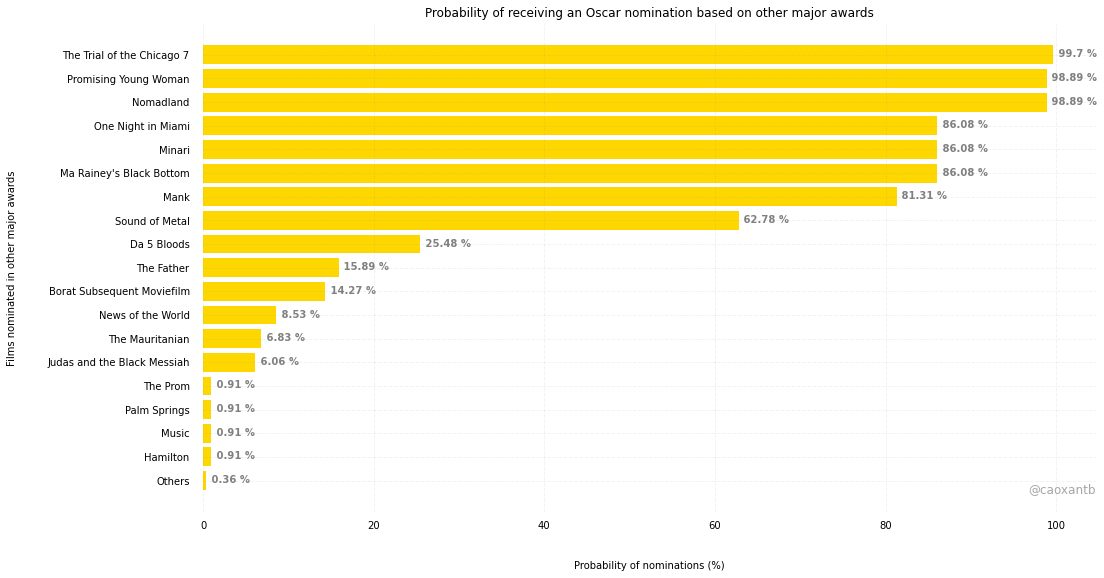

In [2]:
picture.visualize()

Final Predictions:
- The Trial of Chicago 7
- Promising Young Woman
- Nomadland
- One Night in Miami
- Minari 
- Ma Rainey's Black Bottom
- The Father
- Mank
- The Mauritanian
- Sound of Metal

### Best Directing

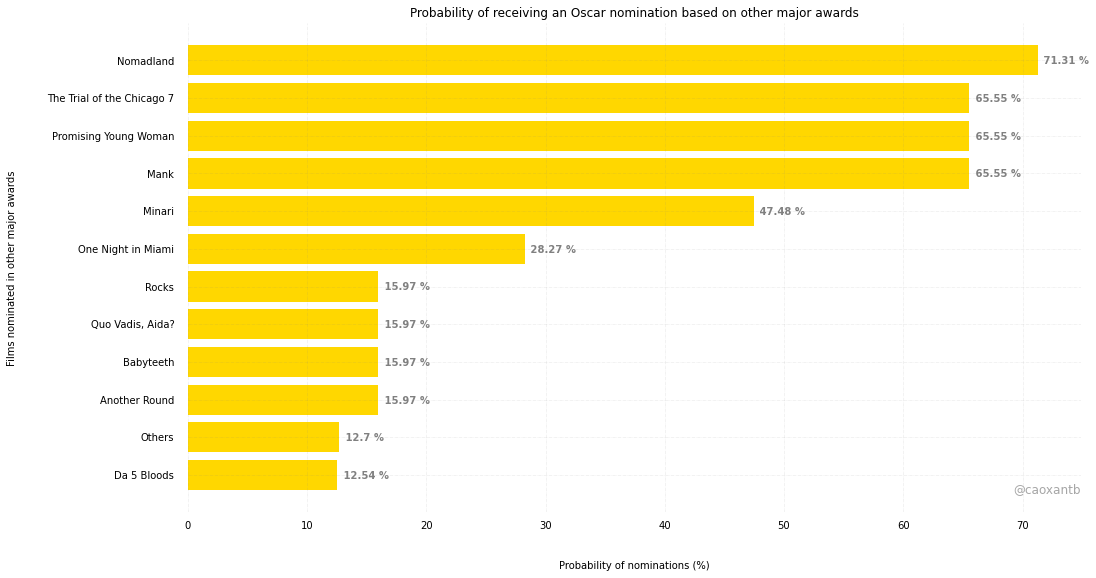

In [3]:
directing.visualize()

Final Predictions:
- Chloe Zhao - Nomadland
- Aaron Sorkin - The Trial of the Chicago 7
- Emerald Fennell - Promising Young Woman
- David Fincher - Mank
- Lee Isaac Chung - Minari

### Best Actor in a Leading Role

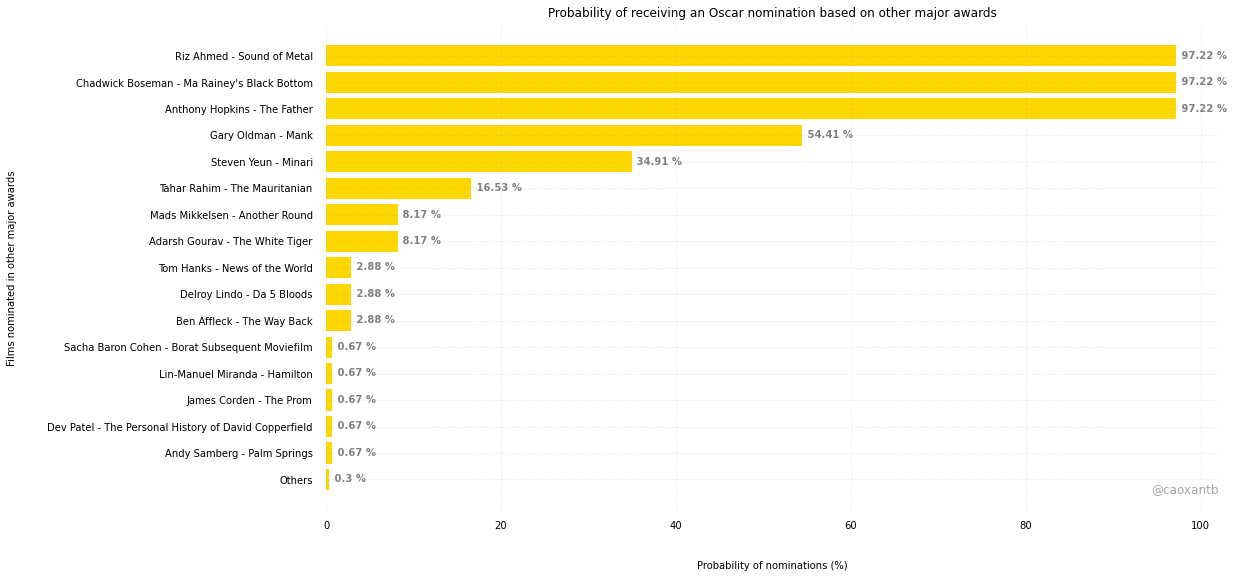

In [4]:
leading_actor.visualize()

Final Predictions:
- Riz Ahmed - Sound of Metal
- Chadwick Boseman - Ma Rainey's Black Bottom
- Anthony Hopkins - The Father
- Gary Oldman - Mank
- Steven Yeun - Minari

### Best Actress in a Leading Role

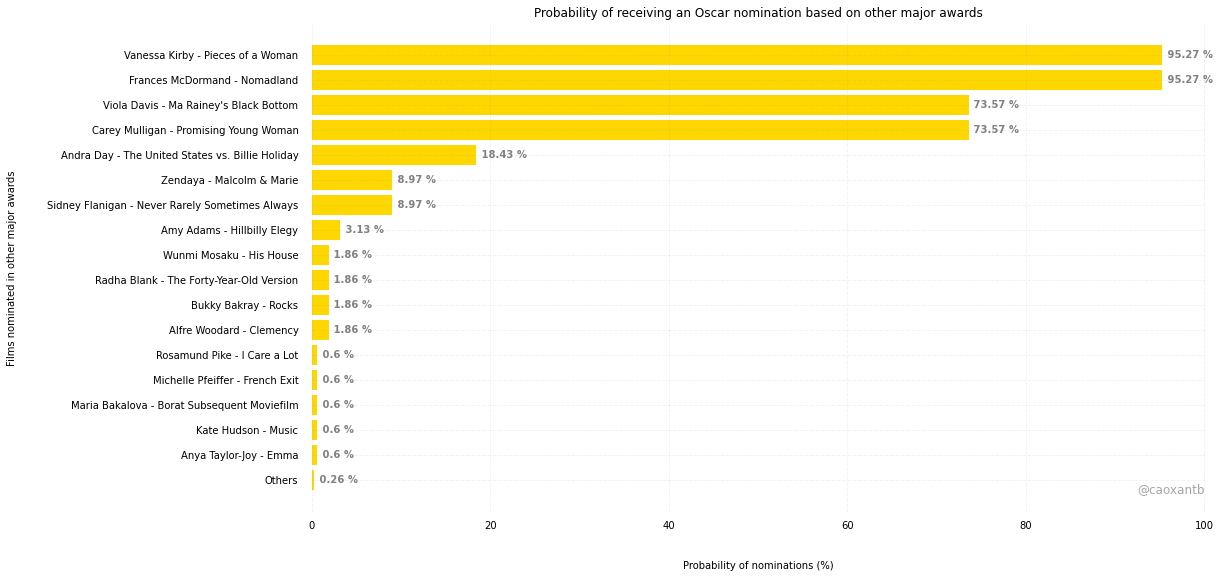

In [5]:
leading_actress.visualize()

Final Predictions:
- Vanessa Kirby - Pieces of a Woman
- Frances McDormand - Nomadland
- Viola Davis - Ma Rainey's Black Bottom
- Carey Mulligan - Promising Young Woman
- Andra Day - The United States vs. Billie Holiday

### Best Actor in a Supporting Role

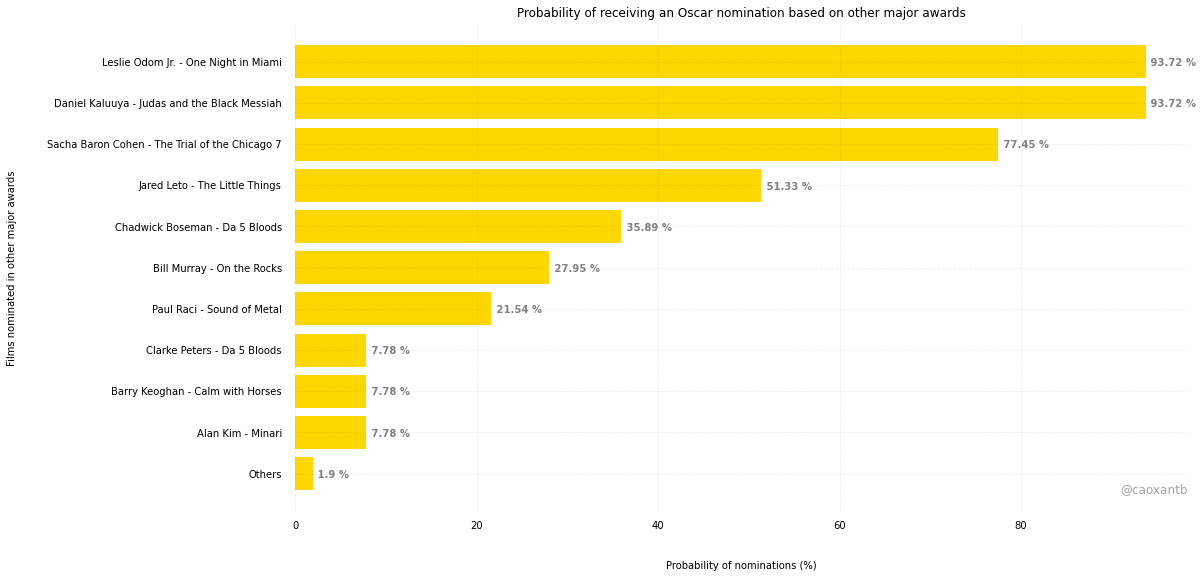

In [6]:
supporting_actor.visualize()

Final Predictions:
- Leslie Odom Jr. - One Night in Miami
- Daniel Kaluuya - Judas and the Black Messiah
- Sacha Baron Cohen - The Trial of the Chicago 7
- Jared Leto - The Little Things
- Chadwick Boseman - Da 5 Bloods

### Best Actress in a Supporting Role

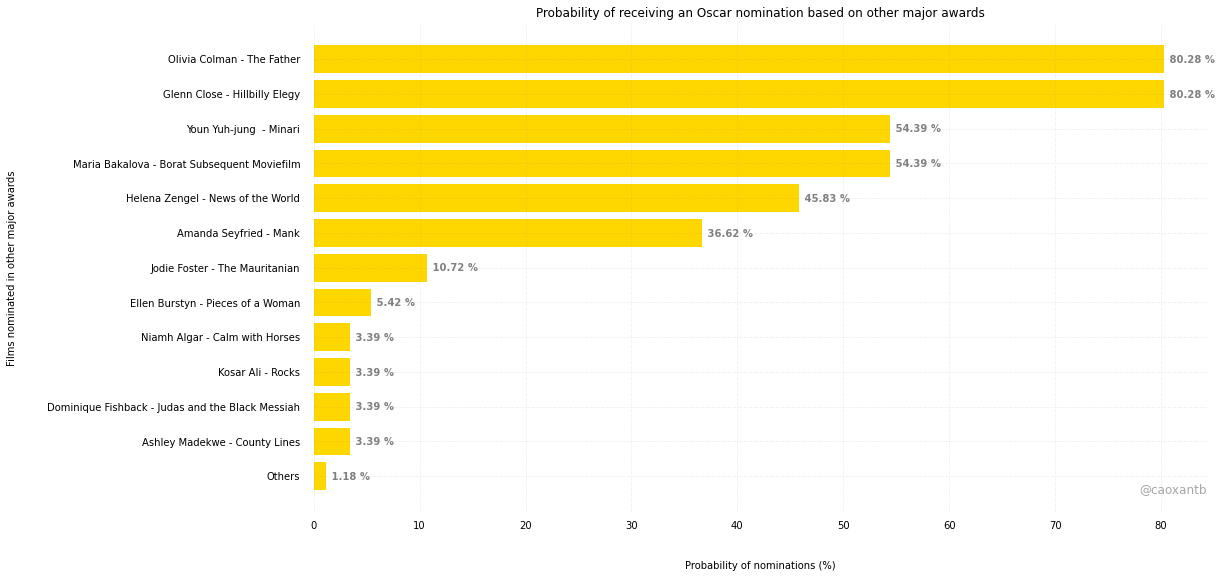

In [7]:
supporting_actress.visualize()

Final Predictions:
- Olivia Colman - The Father
- Glenn Close - Hillbilly Elegy
- Helena Zengel - News of the World
- Youn Yuh-jung  - Minari
- Maria Bakalova - Borat Subsequent Moviefilm

### Best Original Screenplay

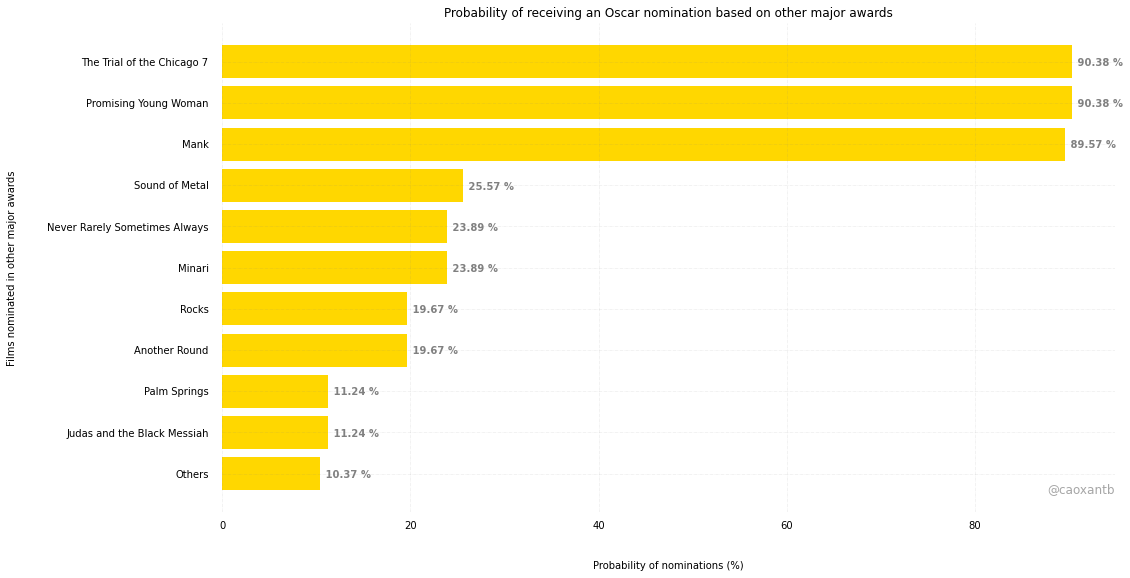

In [8]:
original_screenplay.visualize()

Final Predictions:
- The Trial of the Chicago 7
- Promising Young Woman
- Mank
- Sound of Metal
- Minari

### Best Adapted Screenplay

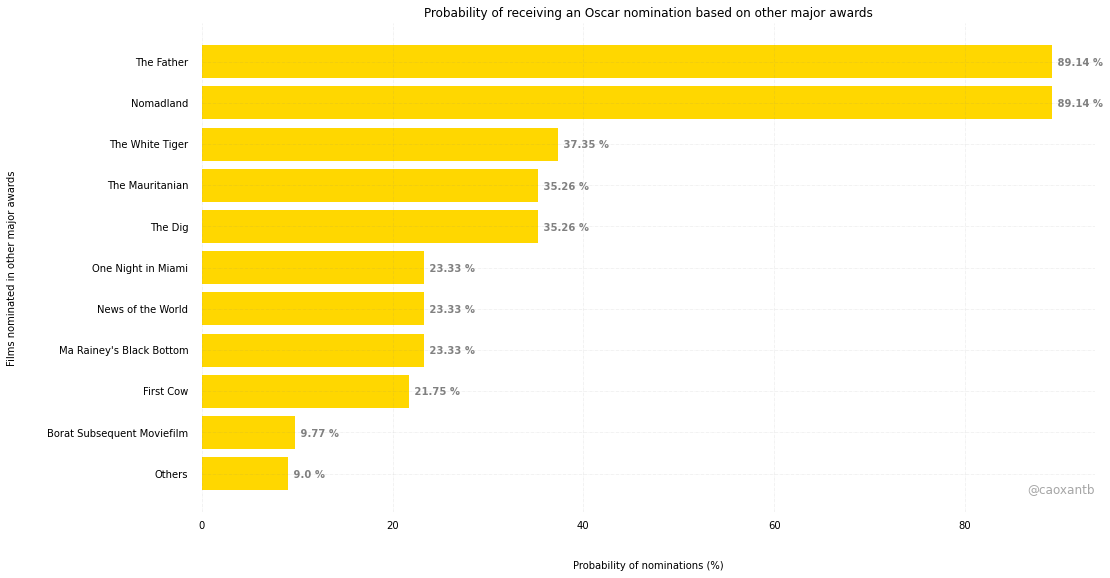

In [9]:
adapted_screenplay.visualize()

Final Predictions:
- The Father
- Nomadland
- The White Tiger
- The Mauritanian
- The Dig

### Best Animated Feature

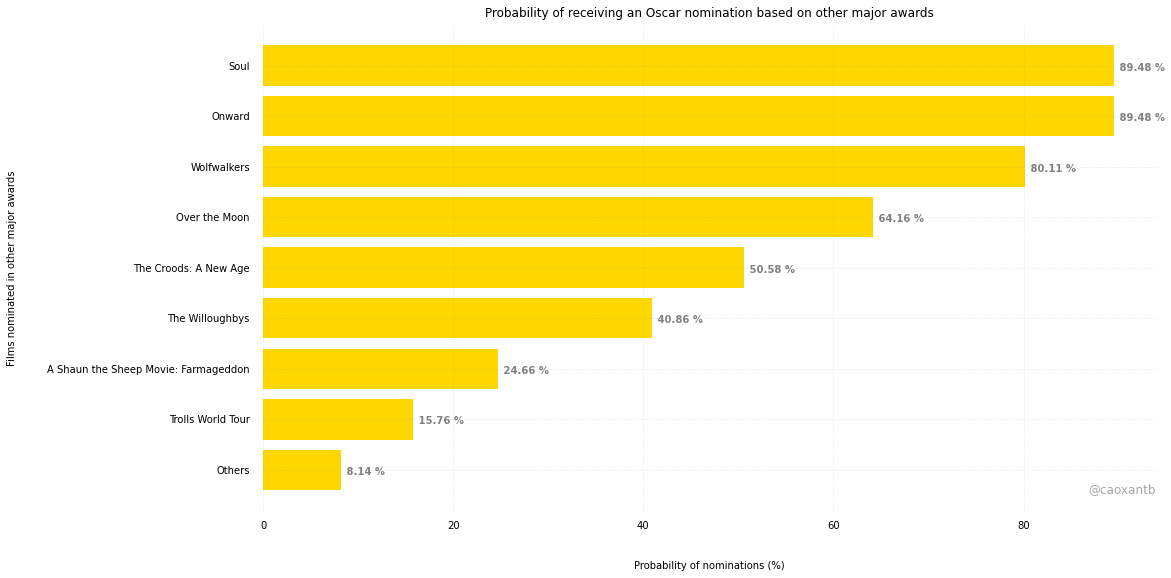

In [10]:
animated_feature.visualize()

Final Predictions:
- Soul
- Onward
- Wolfwalkers
- Over the Moon
- The Croods: A New Age

### Best International Feature

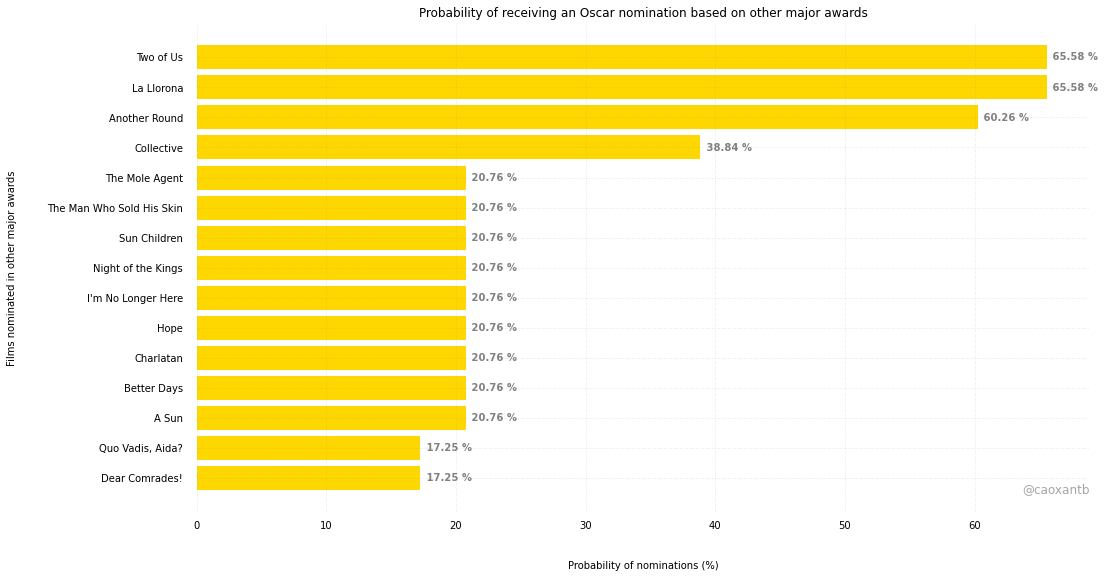

In [11]:
international_feature.visualize()

Final Predictions:
- Two of Us
- La Llorona
- Another Round
- Collective
- I'm No Longer Here

### Best Original Score

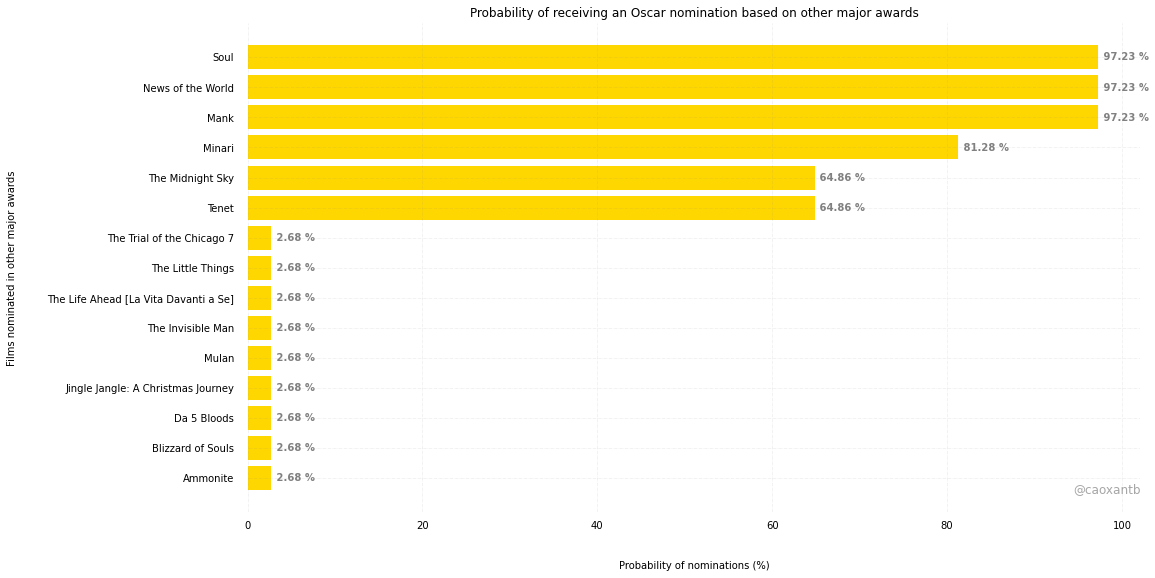

In [12]:
score.visualize()

Final Predictions:
- Soul
- News of the World
- Mank
- Minari
- The Midnight Sky


### Best Original Song

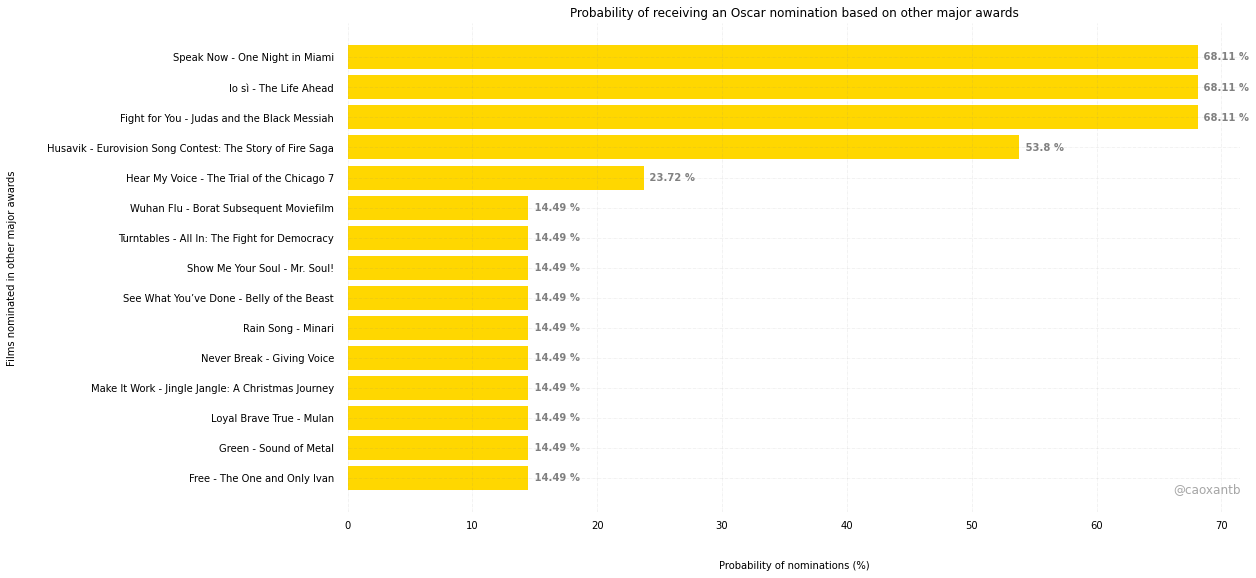

In [13]:
song.visualize()

Final Predictions:
- "Speak Now" - One Night in Miami
- "Io sì" - The Life Ahead
- "Fight for You" - Judas and the Black Messiah
- "Husavik" - Eurovision Song Contest: The Story of Fire Saga
- "Hear My Voice" - The Trial of the Chicago 7

### Best Cinematography

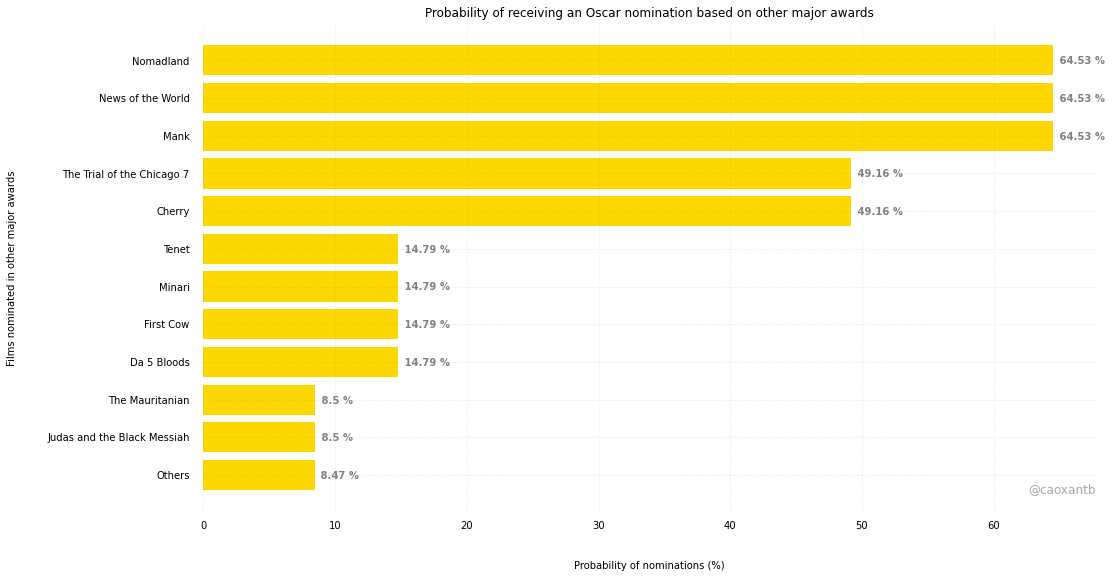

In [14]:
cinematography.visualize()

Predictions:
- Nomadland
- News of the World
- Mank
- The Trial of the Chicago 7
- Cherry

### Best Production Design

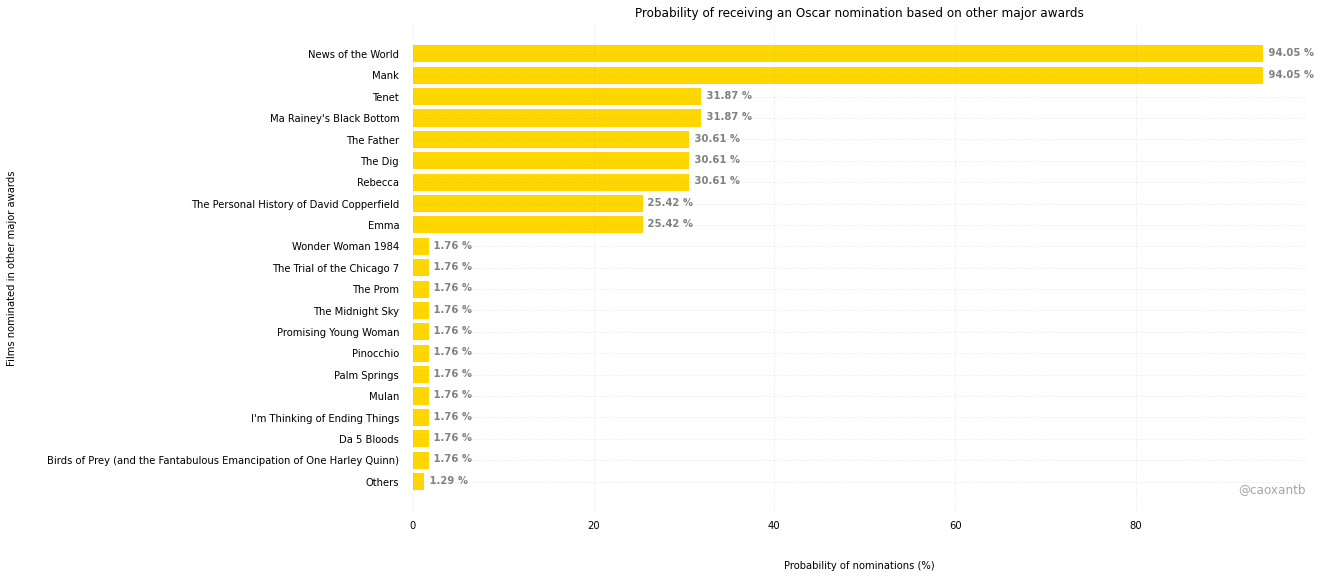

In [15]:
production_design.visualize()

Final Predictions:
- News of the World
- Mank
- The Father
- The Dig
- Rebecca

### Best Costume Design

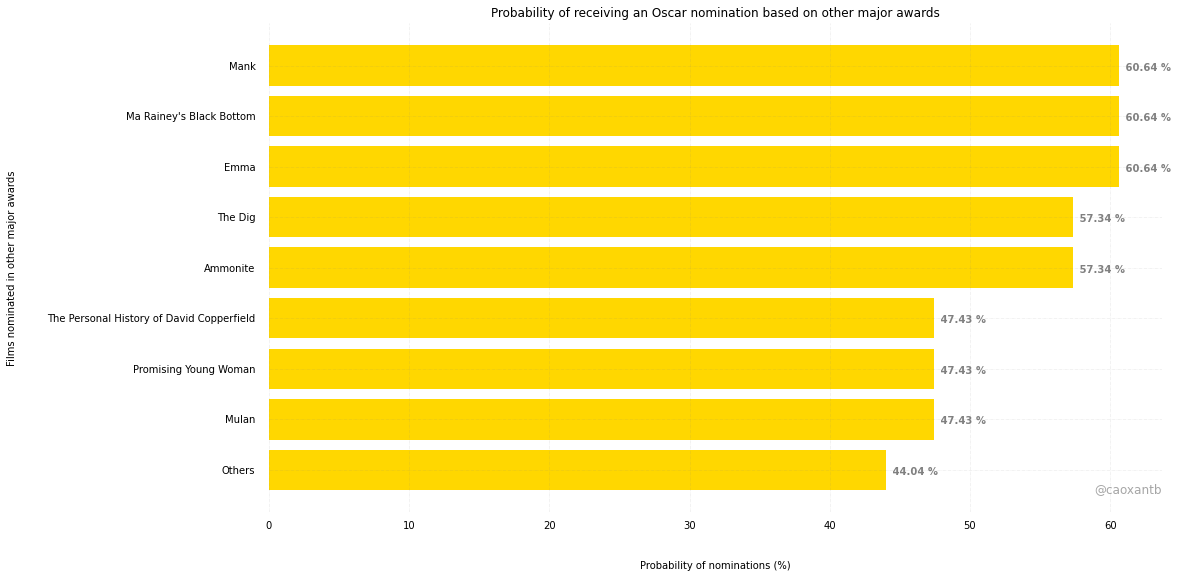

In [16]:
costume_design.visualize()

Final Predictions:
- Mank
- Ma Rainey's Black Bottom
- Emma
- The Dig
- Ammonite

### Best Makeup and Hairstyling

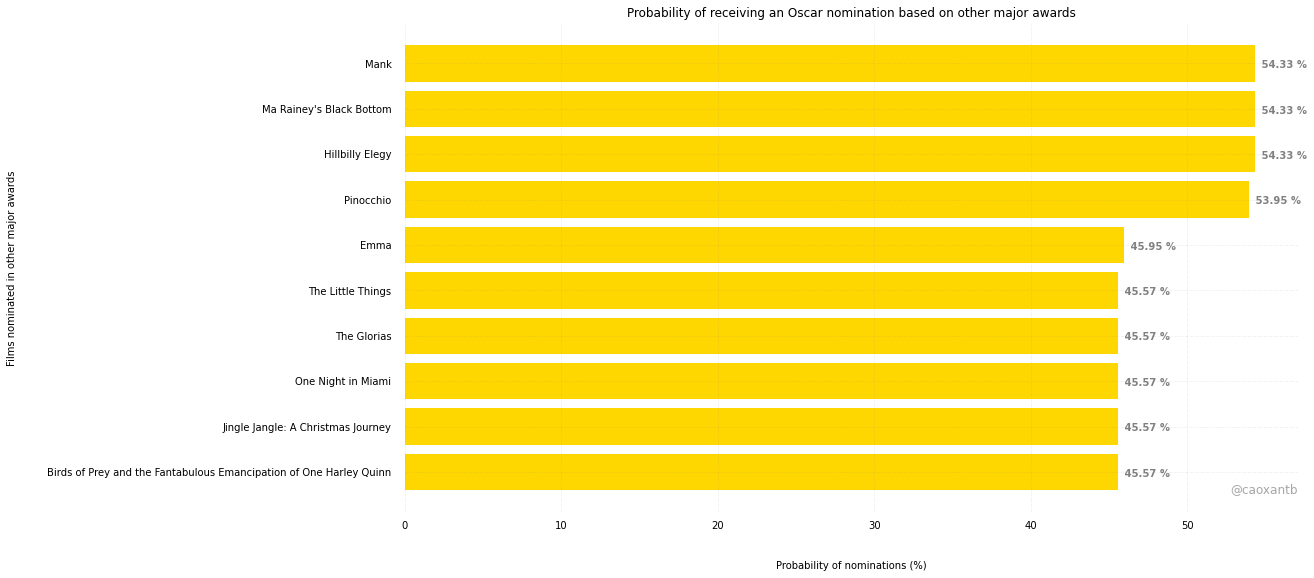

In [17]:
makeup_hairstyling.visualize()

Final Predictions:
- Mank
- Ma Rainey's Black Bottom
- Hillbilly Elegy
- Pinocchio
- Emma

### Best Editing

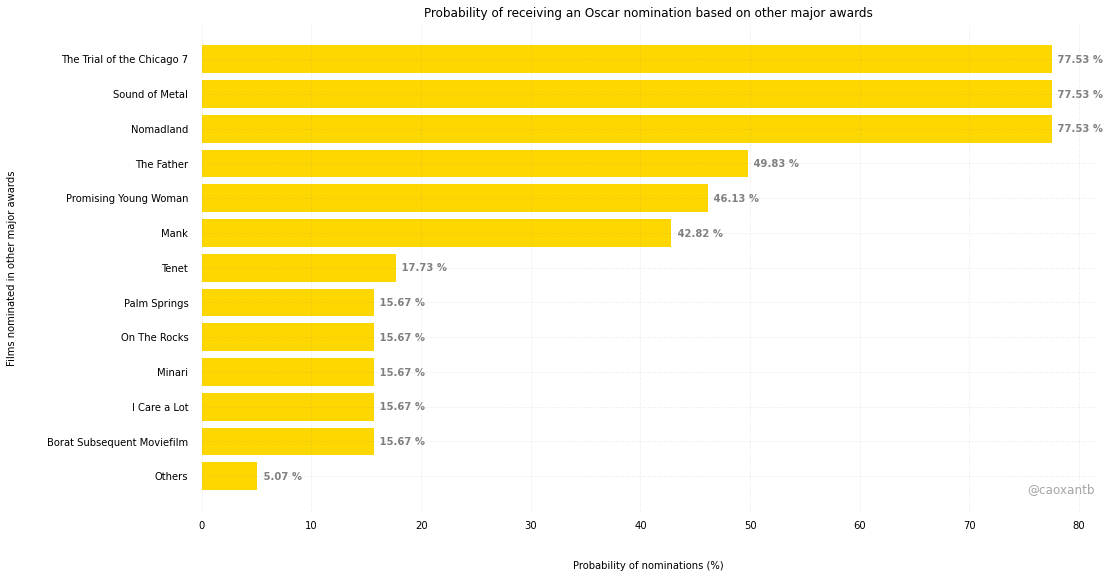

In [18]:
editing.visualize()

Final Predictions:
- The Trial of the Chicago 7
- Sound of Metal
- Nomadland
- The Father
- Promising Young Woman

### Best Visual Effects

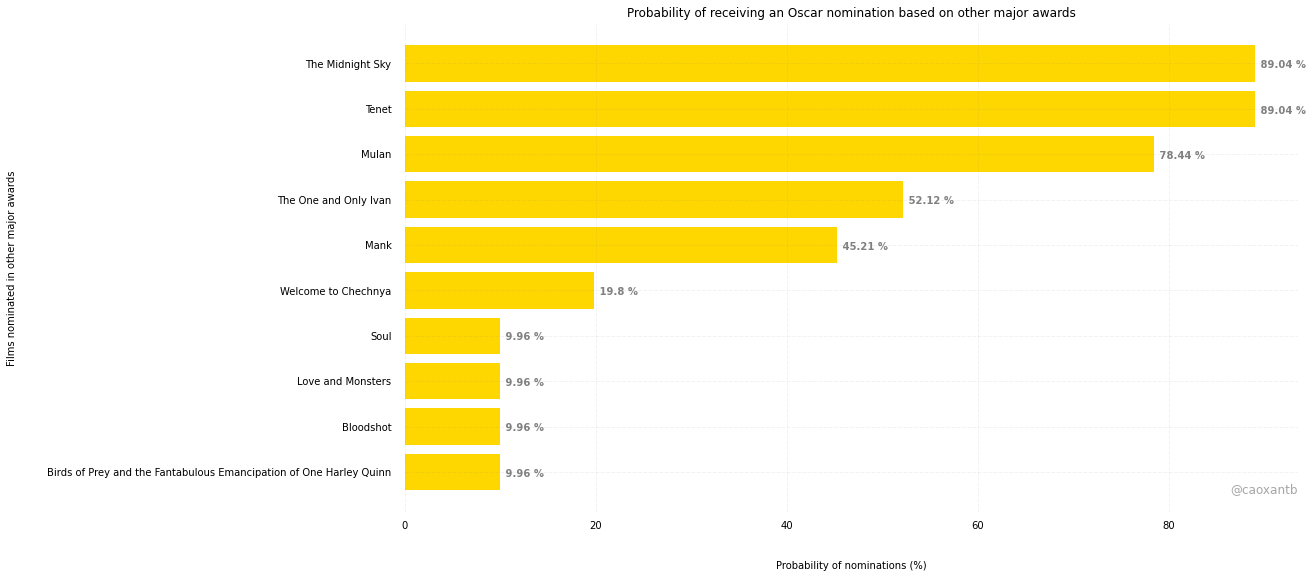

In [19]:
visual_effects.visualize()

Final Predictions:
- Mulan
- The One and Only Ivan
- The Midnight Sky
- Tenet
- Soul

## Remarks

There I presented you my Oscars 2021 predictions based 90% on data and statistics and 10% on personal experience. Tất nhiên là khi làm cái này thì cũng không thể tránh khỏi có những tính toán sai sót (j mình không major in statistics), và năm nay là một năm đầy biến động với rất nhiều **điểm mù thống kê** (i.e, năm nay BAFTA thay đổi quy chế bầu chọn nên mọi tính toán có dính dáng đến BAFTA đảo lộn khá nhiều). Tuy nhiên I did my best so yeh nếu ai còn tồn tại ở đây đến dòng này thì thankiu veri much!! Đợi bh cbi trao giải thì sẽ có post dự đoán ai sẽ đoạt giải nhé UwU ><